# **FPL: A DS Approach for Team Selection**

## 1. Enviroment Configuration

>Import Libraries

In [3]:
# Import Libraries
import FPLClient as client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pprint


## 2. Load Client


>Custom python [wrapper](./api.py) for FPL REST API

In [4]:
client = client.FPLClient()

## 3. Auxiliary Dataframes and Functions

>Maps Column _mValue_ from DataFrame _mapper_ by _mIndex_ to Dataframe _df_ by _dfIndex_

In [5]:
# Maps two columns on two DataFrames

def getMappedDF(df,dfIndex,mapper,mIndex,mValue):
    mapperFilter = mapper[[mIndex,mValue]].copy()
    df = pd.merge(df, mapperFilter,
                  how='left',
                  left_on=dfIndex,
                  right_on=mIndex)
    if dfIndex != mIndex:
        try:
            df.drop(mIndex,axis=1,inplace=True)
        except:
            pass
    return df

In [6]:
# Teams DataFrame general data

teams = client.general.teams_details()
teams.head()   
    

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1250,1360,1260,1370,1240,1350,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1110,1240,1080,1160,1140,1320,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1140,1175,1080,1140,1190,1210,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1080,1225,1070,1100,1090,1350,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1110,1150,1080,1100,1140,1200,131


In [7]:
# Players DataFrame general data

players = client.general.players_details()
players.head()

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,True,False,0.0,0.0,438098,0,0,-1,1,0,...,130,77,691,309,700,315,649,283,0.00,0.00
1,True,True,100.0,100.0,205651,0,0,-1,1,2,...,29,14,11,2,193,25,36,9,0.90,0.30
2,True,True,100.0,100.0,226597,0,0,4,-4,2,...,50,3,53,15,28,3,9,2,1.05,0.35
3,True,True,75.0,75.0,219847,0,0,-1,1,1,...,13,5,72,12,39,11,40,10,1.03,0.36
4,True,False,0.0,0.0,463748,0,0,0,0,0,...,636,59,461,56,534,61,567,68,0.00,0.00


In [8]:
# Players' position mapping

playersType = pd.DataFrame(
    {
        'element_type':list(range(1,5)),
        'type_string': ['Goalkeeper','Defense','Midfield','Forward']
    }
)
players = getMappedDF(players,'element_type',playersType,'element_type','type_string')
players.head()

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,type_string
0,True,False,0.0,0.0,438098,0,0,-1,1,0,...,77,691,309,700,315,649,283,0.00,0.00,Midfield
1,True,True,100.0,100.0,205651,0,0,-1,1,2,...,14,11,2,193,25,36,9,0.90,0.30,Forward
2,True,True,100.0,100.0,226597,0,0,4,-4,2,...,3,53,15,28,3,9,2,1.05,0.35,Defense
3,True,True,75.0,75.0,219847,0,0,-1,1,1,...,5,72,12,39,11,40,10,1.03,0.36,Forward
4,True,False,0.0,0.0,463748,0,0,0,0,0,...,59,461,56,534,61,567,68,0.00,0.00,Goalkeeper


In [9]:
fixtures = pd.DataFrame(client.fixtures.all())
fixtures.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2444613,NaN,False,False,144,None,0,True,None,12,NaN,8,NaN,[],5,3,115970
1,2444470,1.0,True,True,1,2024-08-16T19:00:00Z,90,False,True,9,0.0,14,1.0,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",3,3,115827
2,2444473,1.0,True,True,4,2024-08-17T11:30:00Z,90,False,True,12,2.0,10,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",5,2,115830
3,2444471,1.0,True,True,2,2024-08-17T14:00:00Z,90,False,True,20,0.0,1,2.0,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,5,115828
4,2444472,1.0,True,True,3,2024-08-17T14:00:00Z,90,False,True,5,3.0,8,0.0,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,3,115829


## 3. Feature Engineering

#### 3.1. Main DataFrame extraction

In [10]:
# Gets DF of all player ratings for every match

def get_all_players():
    df_all = pd.DataFrame()
    for player_id in players['id'].tolist():
        a = client.details.all(player_id)
        df_p = pd.DataFrame(a['history'])
        if df_all.__len__() == 0:
            df_all = df_p
        else:
            df_all = pd.concat([df_all, df_p])
    return df_all

_df = get_all_players()
df = _df.copy()

In [9]:
df = _df.copy()

In [10]:
df[df.columns[:20]].head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0
2,1,21,3,0,False,2022-08-20T16:30:00Z,0,3,3,0,0,0,0,0,0,0,0,0,0,0
3,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0
4,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,0,0,0,0,0,0,0,0,0,0


#### 3.2. Mapping

In [11]:
df = getMappedDF(df,'fixture',fixtures,'id','event')

In [12]:
_tableDF = pd.DataFrame()
_list = df.event.unique()
_list.sort()
for _ in _list:
    _tableWDF = client.fixtures.get_table(_)
    _tableWDF['event'] = _
    if _tableDF.__len__() == 0:
        _tableDF = _tableWDF
    else:
        _tableDF = pd.concat([_tableDF, _tableWDF])

_tableDF.reset_index(inplace=True)
_tableDF['index'] += 1
_tableDF.columns = ['position_oppo', 'opponent_team', 'points', 'favor', 'against', 'diff', 'event']
df = pd.merge(df, _tableDF[['position_oppo', 'opponent_team', 'event']], how='left',
              left_on=['opponent_team', 'event'],
              right_on=['opponent_team', 'event'])

_fixtureMerge = fixtures[['team_h', 'team_a', 'event']].copy()
_oppoVisitDF = df.loc[df['was_home']].copy()
_fixtureMerge.columns = ['team', 'opponent_team', 'event']
_oppoVisitDF = pd.merge(_oppoVisitDF, _fixtureMerge, how='left',
                       left_on=['opponent_team', 'event'],
                       right_on=['opponent_team', 'event'])

_oppoHomeDF = df.loc[~df['was_home']].copy()
_fixtureMerge.columns = ['opponent_team', 'team', 'event']
_oppoHomeDF = pd.merge(_oppoHomeDF, _fixtureMerge, how='left',
                      left_on=['opponent_team', 'event'],
                      right_on=['opponent_team', 'event'])

df = pd.concat([_oppoVisitDF, _oppoHomeDF], ignore_index=True)
_tableDF.columns = ['position', 'team', 'points', 'favor', 'against', 'diff', 'event']
df = pd.merge(df, _tableDF[['position', 'team', 'event']], how='left',
              left_on=['team', 'event'],
              right_on=['team', 'event'])


df.sort_values(by = ['element', 'fixture']).reset_index(drop=True,inplace=True)

In [13]:
dfMapped = getMappedDF(df,'team',teams,'id','short_name')
dfMapped = getMappedDF(dfMapped,'element',players,'id','web_name')
dfMapped = getMappedDF(dfMapped,'element',players,'id','element_type')

In [14]:
dfMapped.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,selected,transfers_in,transfers_out,event,position_oppo,team,position,short_name,web_name,element_type
0,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,...,24193,1361,6530,2.0,11.0,1,2.0,ARS,Cédric,2
1,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,...,18825,577,3565,4.0,7.0,1,1.0,ARS,Cédric,2
2,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,...,17790,405,2016,5.0,15.0,1,1.0,ARS,Cédric,2
3,1,81,18,0,True,2022-10-01T11:30:00Z,3,1,9,0,...,15362,64,1636,9.0,3.0,1,1.0,ARS,Cédric,2
4,1,91,12,0,True,2022-10-09T15:30:00Z,3,2,10,0,...,14630,148,976,10.0,9.0,1,1.0,ARS,Cédric,2


> Seaborn Config

In [15]:
# Seaborn configuration
%matplotlib inline
# sns.set_palette(sns.color_palette('magma',n_colors=20))
# sns.barplot(data=df,x='team',y='total_points',estimator=sum)
_widthTotal = 15
_heightChart = 3

### 3.3 Team: Highest points

<AxesSubplot: xlabel='short_name', ylabel='total_points'>

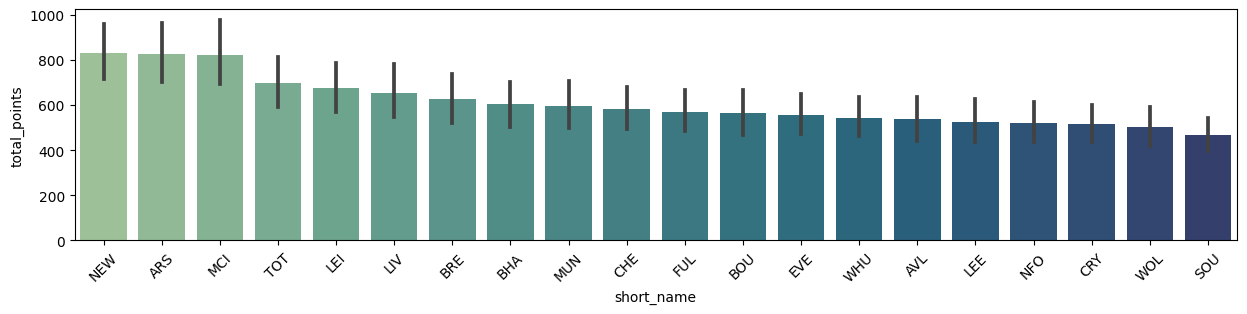

In [16]:
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(data =dfMapped,
            x='short_name',
            y='total_points',
            order = dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index,
            estimator=sum,
            palette='crest')

### 3.4. Players: Highest Score

In [17]:
_dfMappedSum = dfMapped.groupby('element').sum(numeric_only=True)['total_points']
_dfMappedSum2 = dfMapped.groupby('element')['web_name'].apply(pd.Series.mode)
_dfMappedSum= _dfMappedSum.to_frame().join(_dfMappedSum2).sort_values('total_points',ascending=False)
_dfMappedSum.head()

,,total_points,web_name
element,,,
318,0,123,Haaland
427,0,102,Kane
357,0,96,Trippier
369,0,93,Almirón
301,0,90,De Bruyne


<AxesSubplot: xlabel='web_name', ylabel='total_points'>

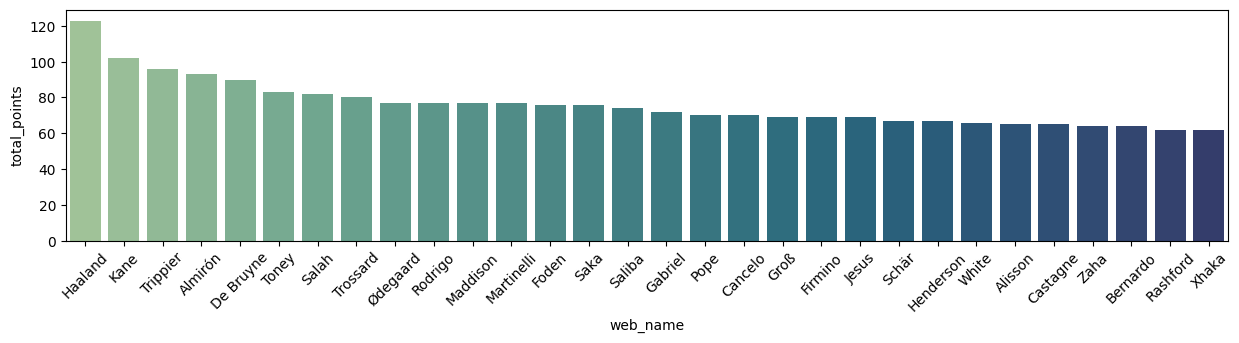

In [18]:
_top = 30
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(
            x=_dfMappedSum['web_name'].head(_top),
            y=_dfMappedSum['total_points'].head(_top),
            # estimator=sum,
            palette='crest')

### 3.5 Player/Team Highest Scores

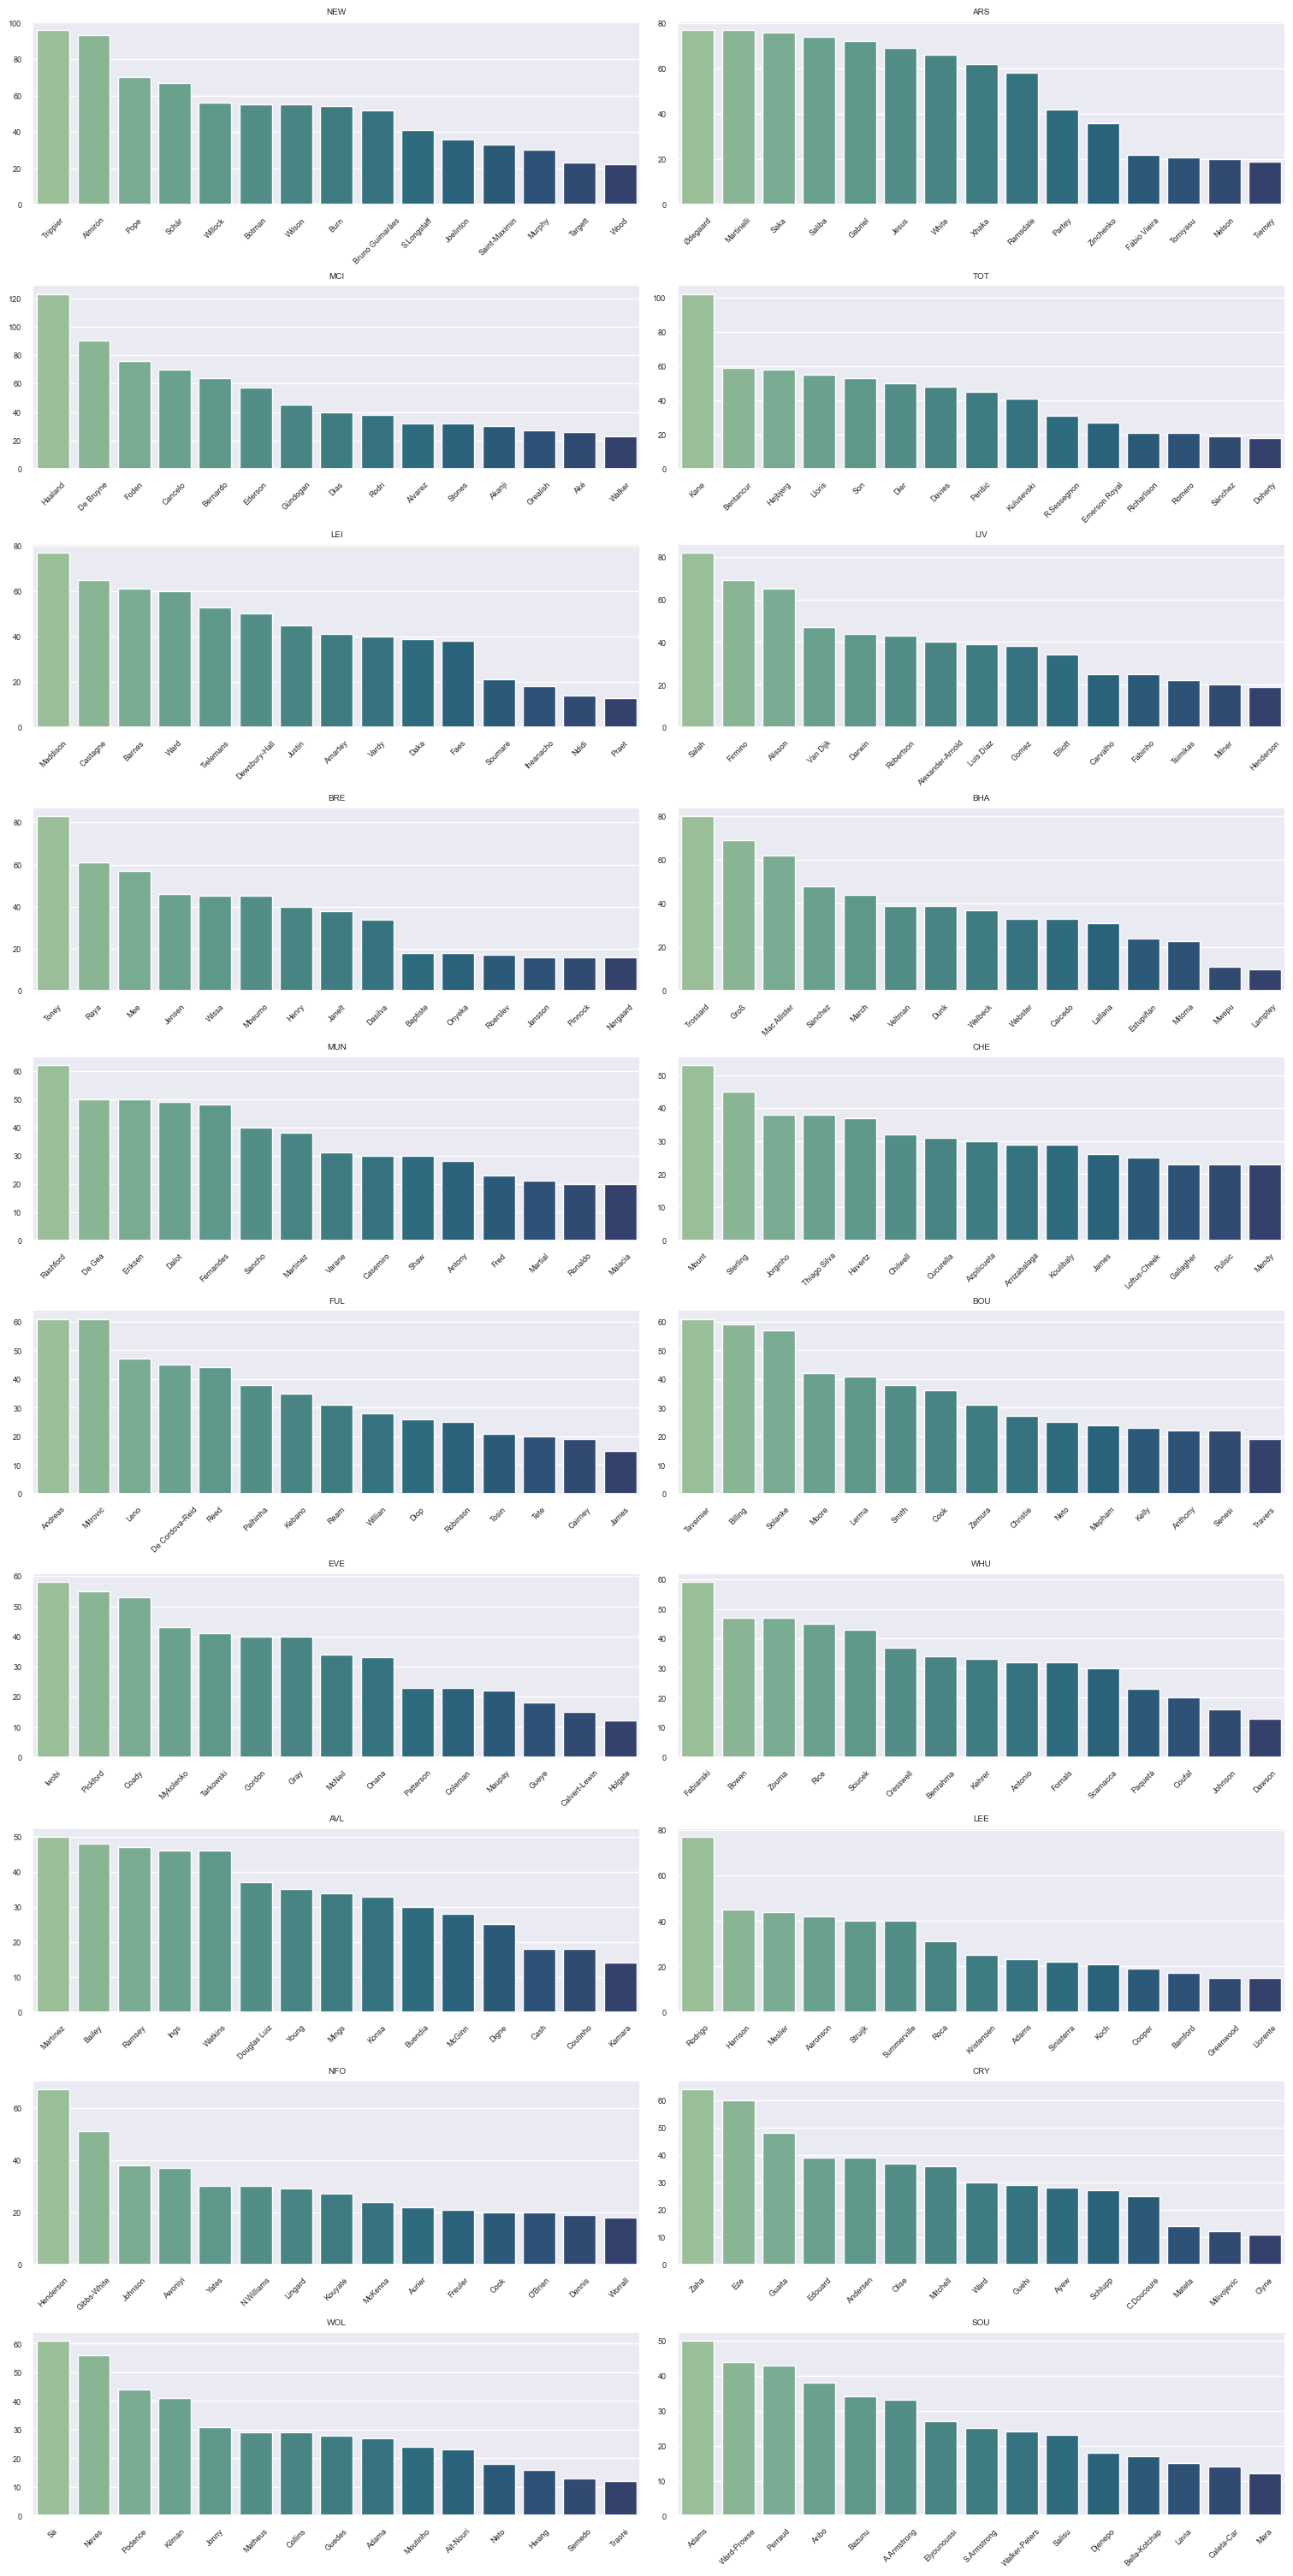

In [19]:
sns.set_theme(font_scale = 0.6)
_chartsCol = 2
_chartsRow = 10
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True)
_ax = _ax.flatten()
_top = 15
_topTeams = list(dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topTeams)):
    _team = _topTeams[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['short_name']==_team].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_team)
    _ax[_].xaxis.label.set_visible(False)
    
    _plot = sns.barplot(
                x=_dfMappedSumTeam.head(_top).index,
                y=_dfMappedSumTeam.head(_top).values,
                # estimator=sum,
                palette='crest',
                ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.6 Positions Highest Score

<AxesSubplot: xlabel='element_type', ylabel='total_points'>

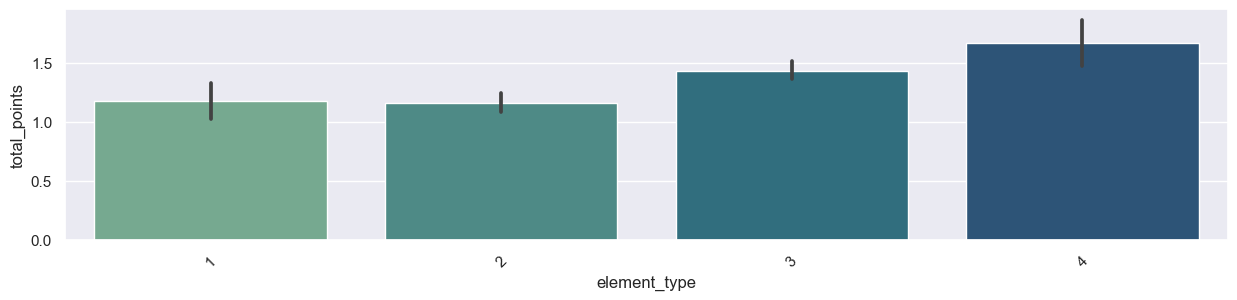

In [20]:
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(
            x=dfMapped['element_type'],
            y=dfMapped['total_points'],
            # estimator=mean,
            palette='crest')

### 3.7 Player/Possition Highest Point

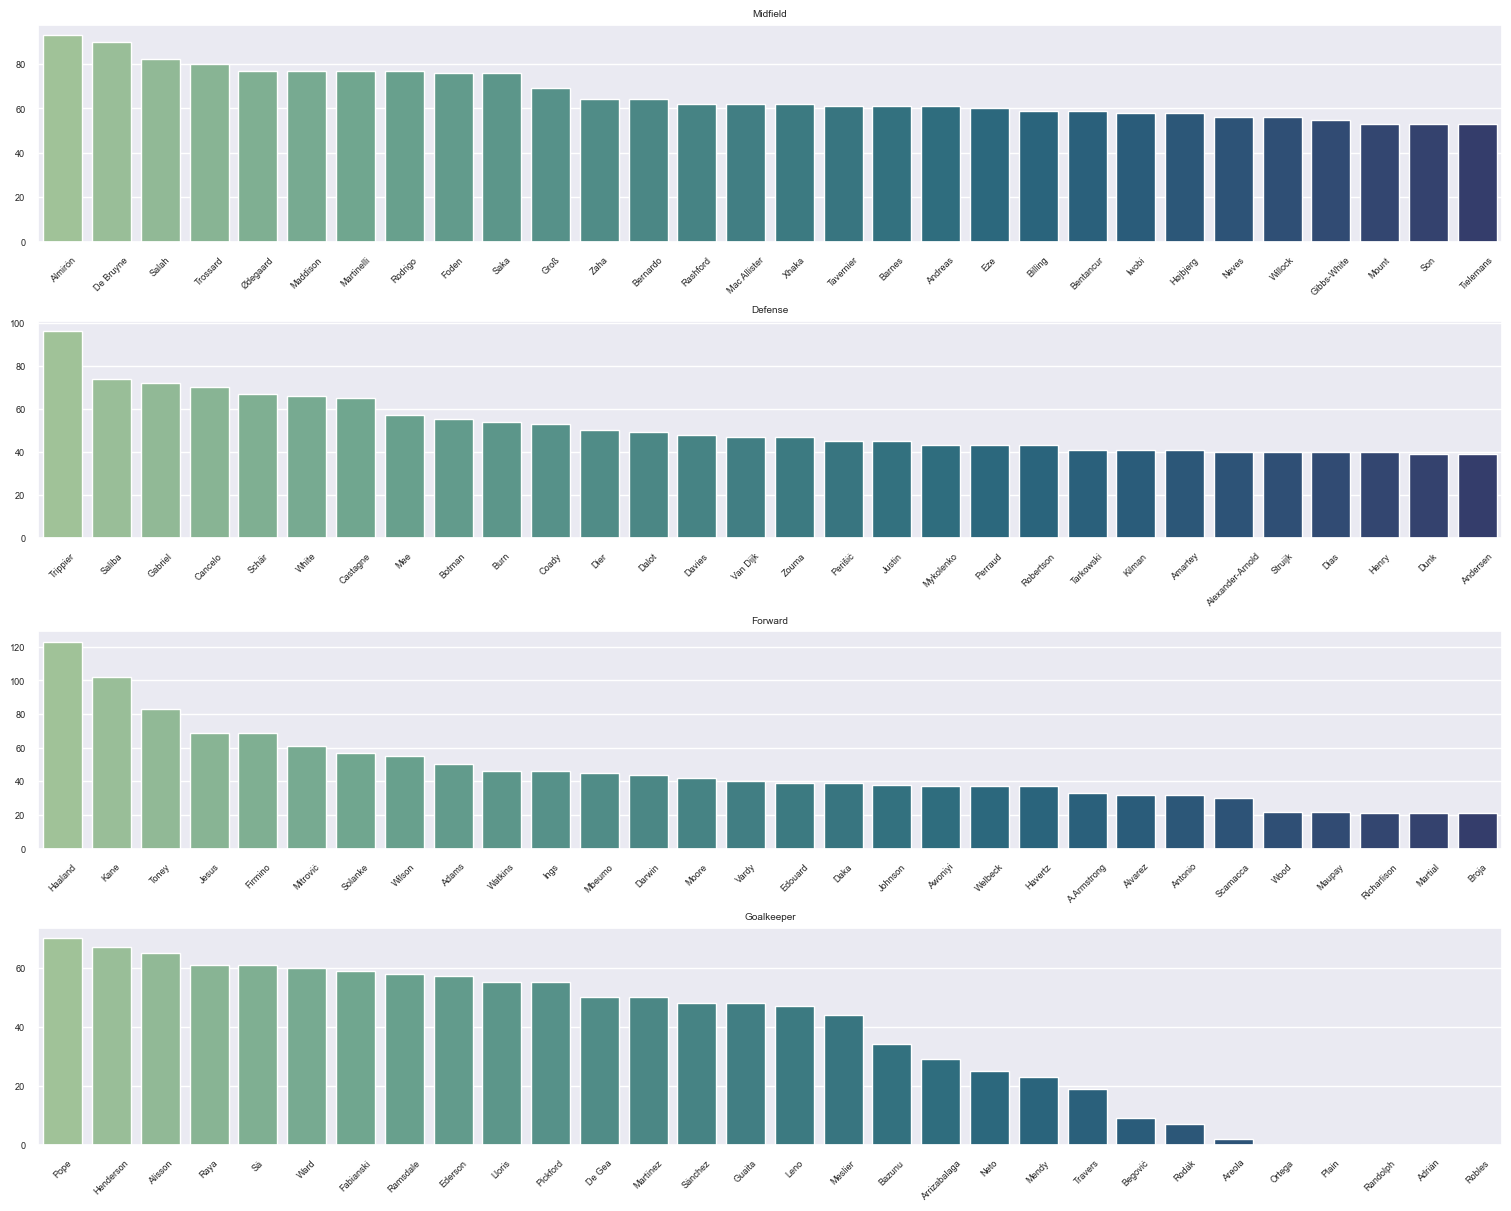

In [21]:
sns.set_theme(font_scale = 0.6)
_chartsCol = 1
_chartsRow = 4
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True)
_ax = _ax.flatten()
_top = 30
_topPositions = list(dfMapped.groupby('element_type').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topPositions)):
    _position = _topPositions[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['element_type']==_position].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(playersType.set_index('element_type').loc[_position,'type_string'])
    _ax[_].xaxis.label.set_visible(False)
    
    sns.barplot(
        x=_dfMappedSumTeam.head(_top).index,
        y=_dfMappedSumTeam.head(_top).values,
        # estimator=sum,
        palette='crest',
        ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.8. Position/Team HS

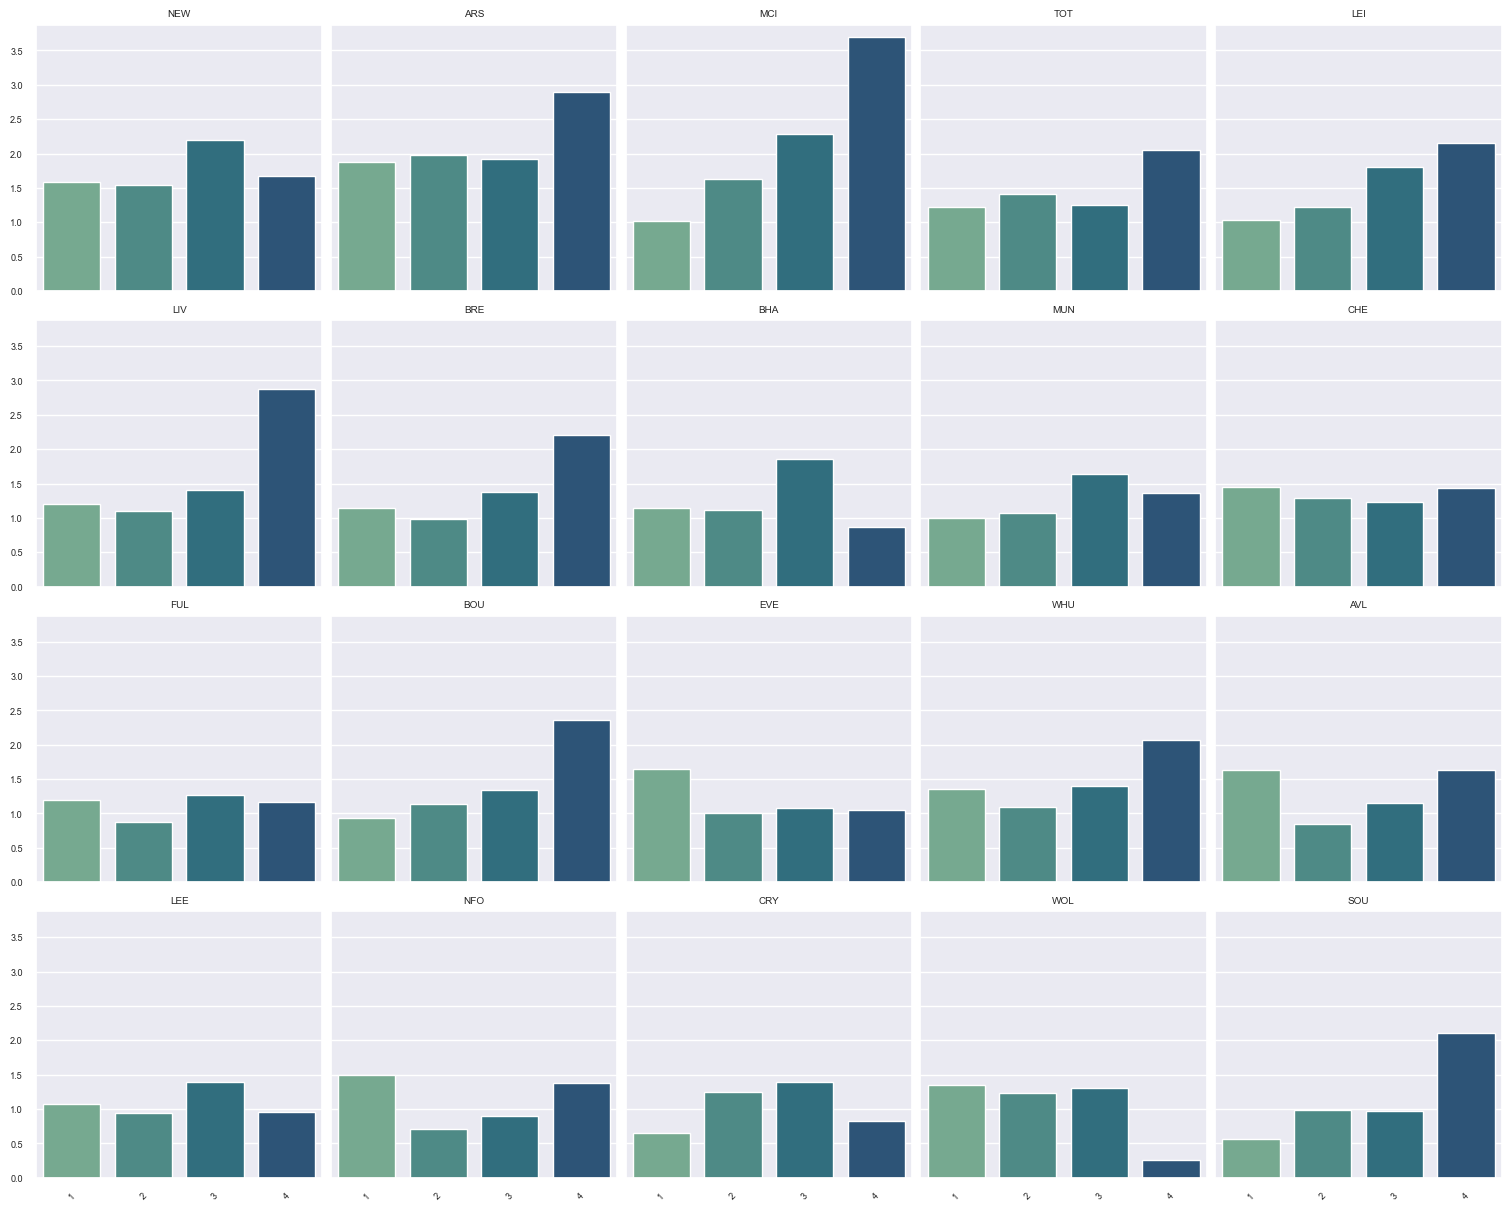

In [22]:
sns.set_theme(font_scale = 0.6)
_chartsRow = 4
_chartsCol = 5
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()
# _top = 30
_topTeams = list(dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topTeams)):
    _team = _topTeams[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['short_name']==_team].groupby('element_type').mean(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_team)
    _ax[_].xaxis.label.set_visible(False)
    
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_dfMappedSumTeam.index,
        y=_dfMappedSumTeam.values,
        # estimator=sum,
        palette='crest',
        ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.9. Players/Fixture HS

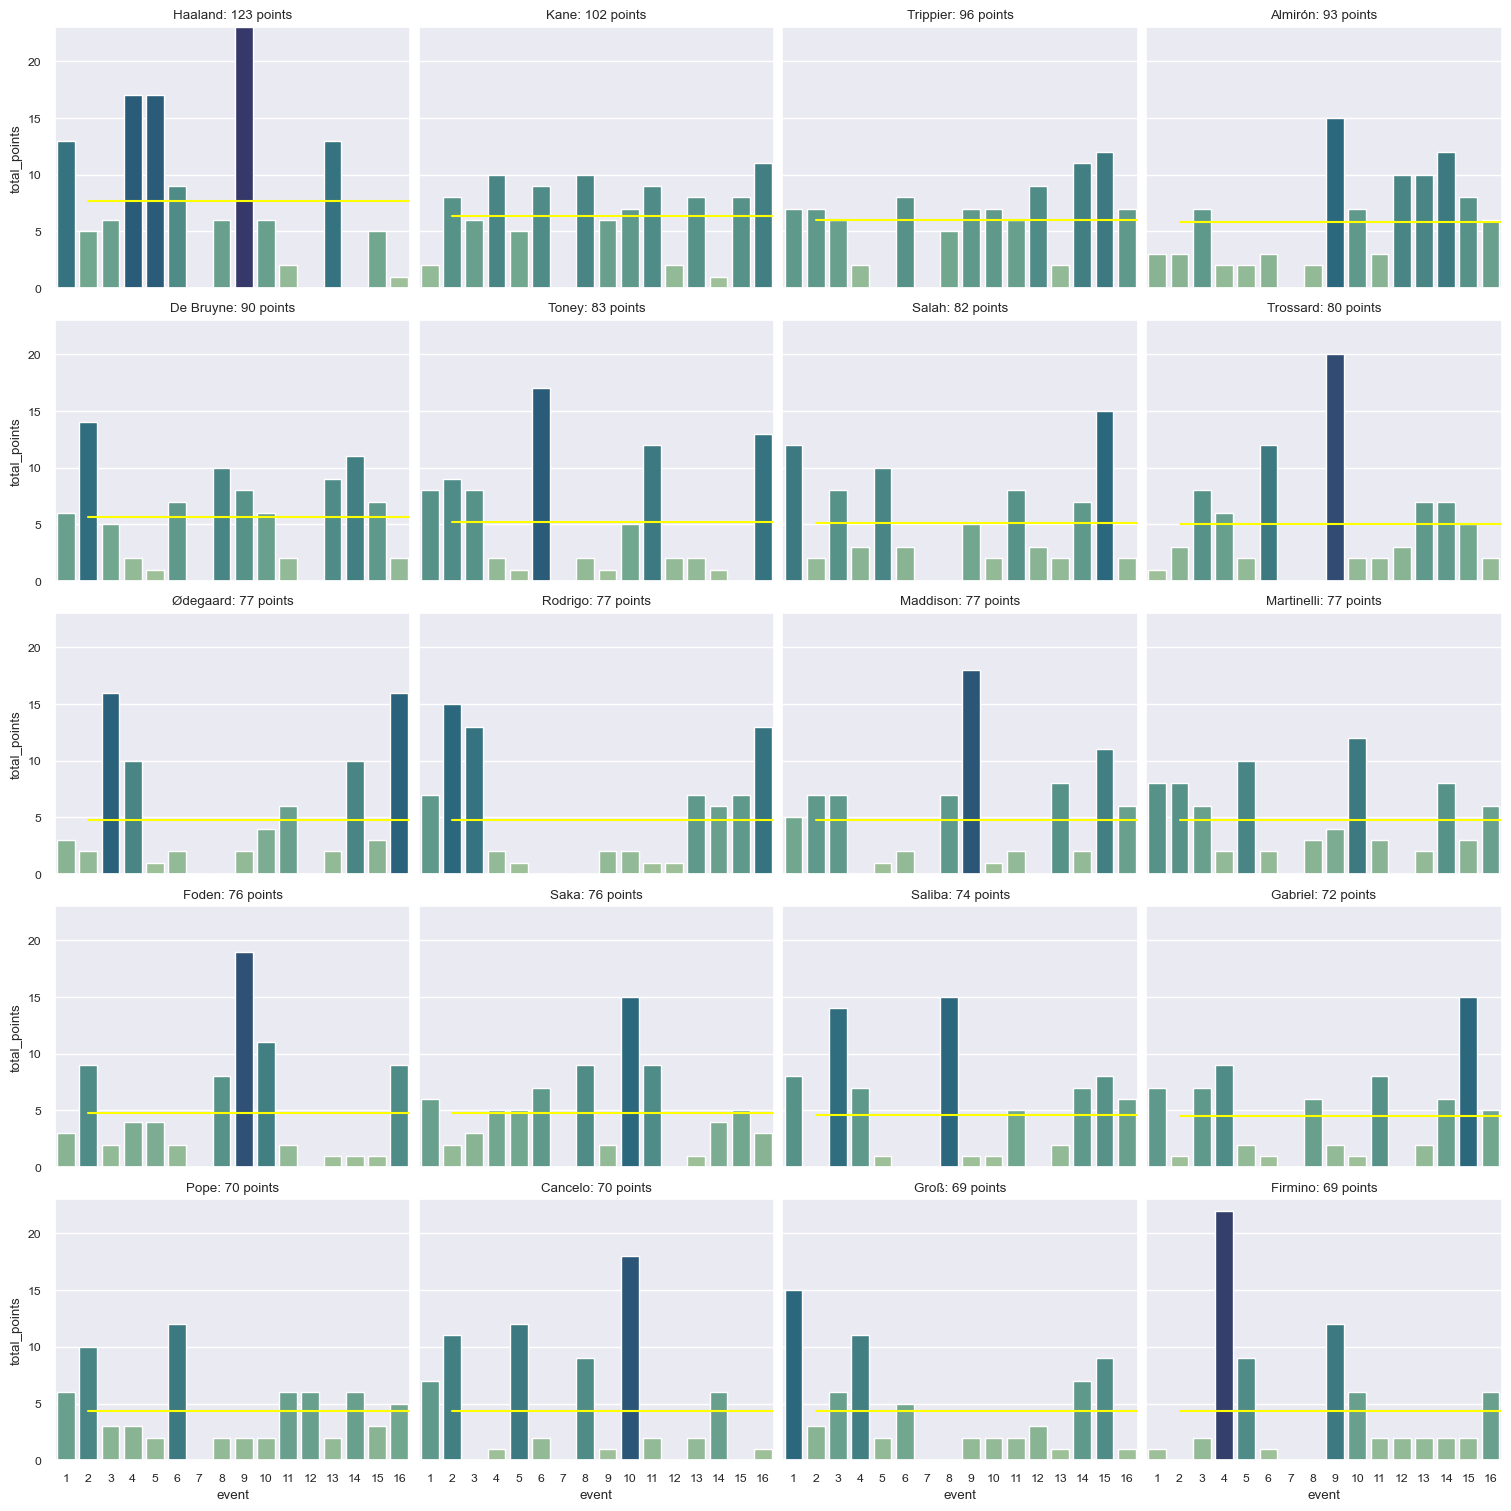

In [23]:
_top = 20
_topPlayers = _dfMappedSum.head(_top)
_topIndex = _topPlayers.index.get_level_values(0).tolist()
_elementsEvents = dfMapped.groupby(by=['element','event']).sum(numeric_only=True)
_elementsEvents =_elementsEvents.loc[_elementsEvents.index.get_level_values(0).isin(_topIndex)].copy()

sns.set_theme(font_scale = 0.8)
_chartsCol = 4
_chartsRow = int(_top/_chartsCol)
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()

_norm = plt.Normalize(0, _elementsEvents['total_points'].max())
_cmap = plt.get_cmap('crest')

for _ in range(0,len(_topIndex)):
    _topCurrent = _topIndex[_]
    _currentName = players.set_index('id').loc[_topCurrent,'web_name']
    _elementEvents = _elementsEvents.loc[_elementsEvents.index.get_level_values(0)==_topCurrent]
    _elementEvents.reset_index(level=0, inplace=True, drop=True)
    _elementEvents=_elementEvents.reindex(np.arange(_elementEvents.index.min(), _elementEvents.index.max()+1)).sort_index()
    _elementEvents.fillna(0,inplace=True)
    # _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_currentName + ': {} points'.format(int(_elementEvents['total_points'].sum())))
    _ax[_].set_ylim(0, _elementsEvents['total_points'].max())
    _colors = _cmap(_norm(_elementEvents['total_points']))
    # plt.colorbar(plt.cm.ScalarMappable(_norm,_cmap),ax=_ax[_])
    # _ax[_].xaxis.label.set_visible(False)
    sns.lineplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=[_elementEvents['total_points'].mean()]*_elementEvents.__len__(),
        color='yellow',
        # estimator=sum,,
        ax=_ax[_])
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=_elementEvents['total_points'],
        # color=_colors,
        # estimator=sum,
        palette=_colors,
        ax=_ax[_])

sns.set_theme(font_scale = 1)


### 3.10 Best Recent Form

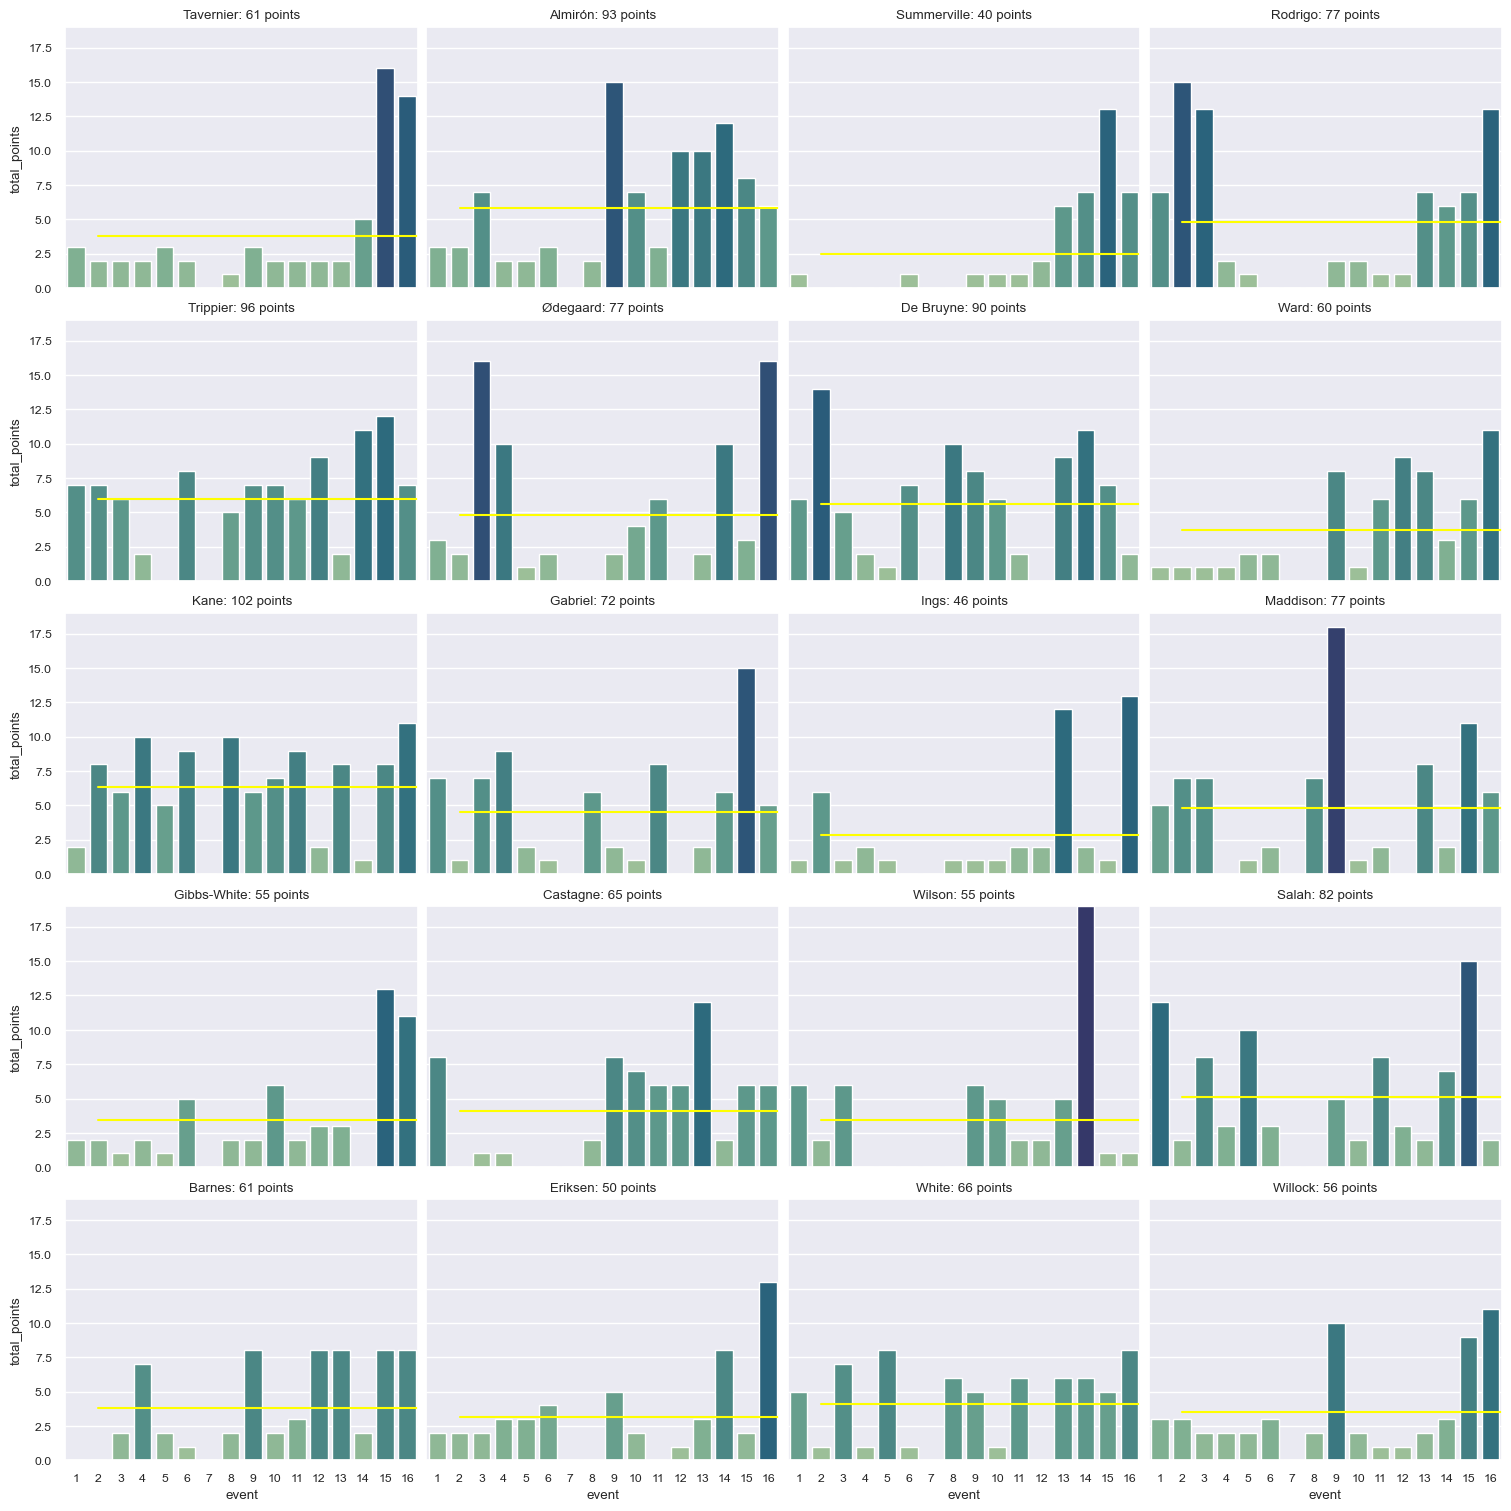

In [24]:
_top = 20
_topLastFixtures = 4
_dfMappedLast = dfMapped.loc[dfMapped['event']>dfMapped['event'].max()-_topLastFixtures].copy()
_dfMappedLastSum = _dfMappedLast.groupby('element').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
_topPlayers = _dfMappedLastSum.head(_top)
_topIndex = _topPlayers.index.tolist()
_topIndex
_elementsEvents = dfMapped.groupby(by=['element','event']).sum(numeric_only=True)
_elementsEvents =_elementsEvents.loc[_elementsEvents.index.get_level_values(0).isin(_topIndex)].copy()

sns.set_theme(font_scale = 0.8)
_chartsCol = 4
_chartsRow = int(_top/_chartsCol)
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()

_norm = plt.Normalize(0, _elementsEvents['total_points'].max())
_cmap = plt.get_cmap('crest')

for _ in range(0,len(_topIndex)):
    _topCurrent = _topIndex[_]
    _currentName = players.set_index('id').loc[_topCurrent,'web_name']
    _elementEvents = _elementsEvents.loc[_elementsEvents.index.get_level_values(0)==_topCurrent]
    _elementEvents.reset_index(level=0, inplace=True, drop=True)
    _elementEvents=_elementEvents.reindex(np.arange(_elementEvents.index.min(), _elementEvents.index.max()+1)).sort_index()
    _elementEvents.fillna(0,inplace=True)
    # _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_currentName + ': {} points'.format(int(_elementEvents['total_points'].sum())))
    _ax[_].set_ylim(0, _elementsEvents['total_points'].max())
    _colors = _cmap(_norm(_elementEvents['total_points']))
    # plt.colorbar(plt.cm.ScalarMappable(_norm,_cmap),ax=_ax[_])
    # _ax[_].xaxis.label.set_visible(False)
    sns.lineplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=[_elementEvents['total_points'].mean()]*_elementEvents.__len__(),
        color='yellow',
        # estimator=sum,,
        ax=_ax[_])
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=_elementEvents['total_points'],
        # color=_colors,
        # estimator=sum,
        palette=_colors,
        ax=_ax[_])

sns.set_theme(font_scale = 1)


## ML Algorithms
>1. Lazypredict
>2. pyCaret
>3. SKlearn

In [ ]:
colModel = ['element','opponent_team','total_points','was_home','kickoff_time','round','position_oppo','team','element_type','position']
dfModel = dfMapped[colModel].copy()
dfModel['dayWeek'] = pd.to_datetime(dfModel['kickoff_time']).dt.day_of_week
dfModel['hour'] = pd.to_datetime(dfModel['kickoff_time']).dt.hour
dfModel = dfModel[set(dfModel.columns)-set(['kickoff_time'])].copy()
dfModel['was_home'] = dfModel['was_home'].astype(int)


In [31]:
dfModel = dfModel.dropna()
y = dfModel['total_points']
X = dfModel.drop('total_points',axis=1)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.0 sec] [RSS: 87.6592] [loc=2.547 scale=0.820]
[distfit] >[expon     ] [0.0 sec] [RSS: 89.401] [loc=1.000 scale=1.547]
[distfit] >[pareto    ] [0.17 sec] [RSS: 89.2997] [loc=-109216106.864 scale=109216107.864]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 85.3845] [loc=2.500 scale=0.811]
[distfit] >[t         ] [0.08 sec] [RSS: 87.6592] [loc=2.547 scale=0.820]
[distfit] >[genextreme] [0.06 sec] [RSS: 87.6042] [loc=2.288 scale=0.844]
[distfit] >[gamma     ] [0.08 sec] [RSS: 87.6722] [loc=-18.709 scale=0.032]
[distfit] >[lognorm   ] [0.19 sec] [RSS: 87.6656] [loc=-118.522 scale=121.064]
[distfit] >[beta      ] [0.14 sec] [RSS: 87.0309] [loc=0.997 scale=3.003]
[distfit] >[uniform   ] [0.0 sec] [RSS: 87.6765] [loc=1.000 scale=3.000]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 87.6325] [loc=-17.804 scale=5.399]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ndweibull\nRSS(c=1.91349, loc=2.50032, scale=0.810915)'}, xlabel='Values', ylabel='Frequency'>)

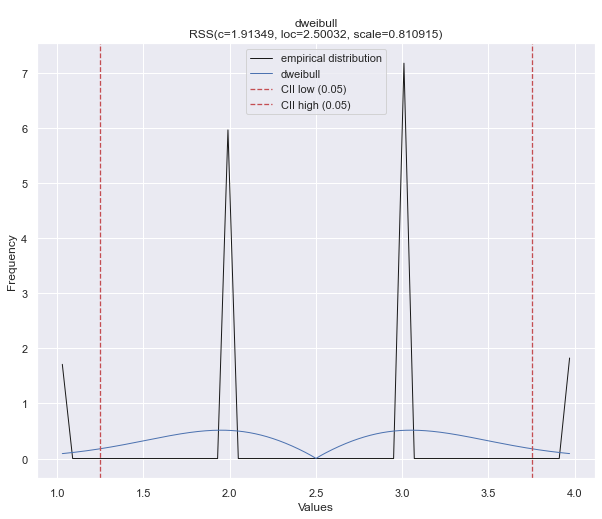

In [ ]:
from distfit import distfit
dist = distfit()
distribution = dist.fit_transform(dfModel['element_type'])
dist.plot()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression().fit(X_train,y_train)
y_predict = lr.predict(X_test)

lr.score(X_test,y_test)



0.024020289229422787